# Data Preparation & Machine Learning CA2

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('NHANES_age_prediction.csv')

In [3]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [5]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [6]:
df['SEQN'].unique()

array([73564., 73568., 73576., ..., 83713., 83718., 83727.])

In [7]:
df['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

In [8]:
# Drop ID colum 
data = df.drop(columns=('SEQN'))
data.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [9]:
data.isnull().sum()

age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2273    False
2274    False
2275    False
2276    False
2277    False
Length: 2278, dtype: bool

In [11]:
data['age_group'].replace('Senior', 0, inplace = True)
data['age_group'].replace('Adult', 1, inplace = True)


In [12]:
!pip install sklearn --user 

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data.RIAGENDR = le.fit_transform(data.RIAGENDR)
data.PAQ605 = le.fit_transform(data.PAQ605)
data.DIQ010 = le.fit_transform(data.DIQ010)

In [53]:
data.head(10)

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,1,61.0,1,1,35.7,110.0,1,150.0,14.91
1,1,26.0,1,1,20.3,89.0,1,80.0,3.85
2,1,16.0,0,1,23.2,89.0,1,68.0,6.14
3,1,32.0,0,1,28.9,104.0,1,84.0,16.15
4,1,38.0,1,0,35.9,103.0,1,81.0,10.92
5,1,50.0,0,1,23.6,110.0,1,100.0,6.08
6,1,14.0,0,1,38.7,94.0,1,202.0,21.11
7,1,57.0,1,1,38.3,107.0,1,164.0,20.93
8,0,75.0,0,1,38.9,89.0,1,113.0,17.47
9,1,43.0,0,0,28.9,90.0,1,95.0,3.24


In [51]:
data['DIQ010']

0       1
1       1
2       1
3       1
4       1
       ..
2273    1
2274    1
2275    1
2276    1
2277    1
Name: DIQ010, Length: 2278, dtype: int64

<Axes: xlabel='DIQ010', ylabel='LBXIN'>

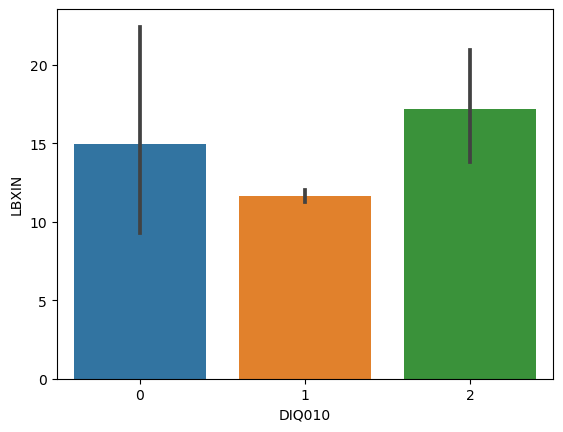

In [39]:
sns.barplot(x="DIQ010", y="LBXIN", data=data)

In [15]:
data['DIQ010'].unique()

array([1, 0, 2], dtype=int64)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age_group  2278 non-null   int64  
 1   RIDAGEYR   2278 non-null   float64
 2   RIAGENDR   2278 non-null   int64  
 3   PAQ605     2278 non-null   int64  
 4   BMXBMI     2278 non-null   float64
 5   LBXGLU     2278 non-null   float64
 6   DIQ010     2278 non-null   int64  
 7   LBXGLT     2278 non-null   float64
 8   LBXIN      2278 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 160.3 KB


In [17]:
df_b = data.groupby(['DIQ010']).LBXIN.mean()

nova= pd.DataFrame(df_b, columns=['LBXIN'])
                                    
nova = nova.reset_index()

nova.head()

,DIQ010,LBXIN
0,0,14.970000
1,1,11.664766
2,2,17.146034


In [18]:
# Capital X because there are more than one feature 
  # y - lower case = because it's only one feature. 
    
X = data.drop(columns=['DIQ010']
y = data['DIQ010']

X.shape, y.shape

((2278, 8), (2278,))

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
easy_lda = lda.fit_transform(X, y)

In [20]:
easy_lda

array([[ 0.85969053,  0.49287658],
       [-0.77917492, -1.33315904],
       [-1.19203317, -0.68915921],
       ...,
       [ 0.00743882,  0.7542482 ],
       [-0.27655713,  0.15367073],
       [-0.06629222, -0.96127208]])

In [21]:
lda.explained_variance_ratio_

array([0.93219862, 0.06780138])

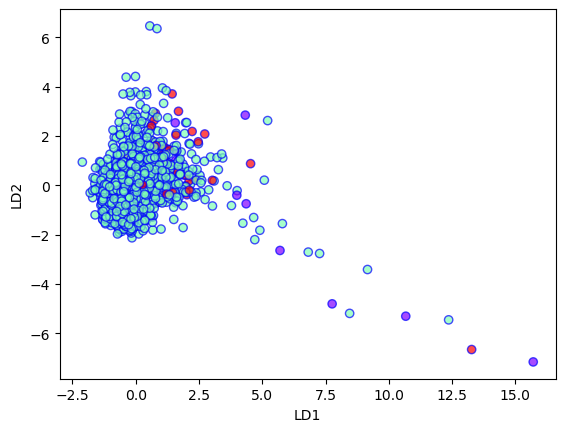

In [22]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    easy_lda[:,0],
    easy_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b')

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [24]:
pca.explained_variance_ratio_

array([0.78741425, 0.11727873])

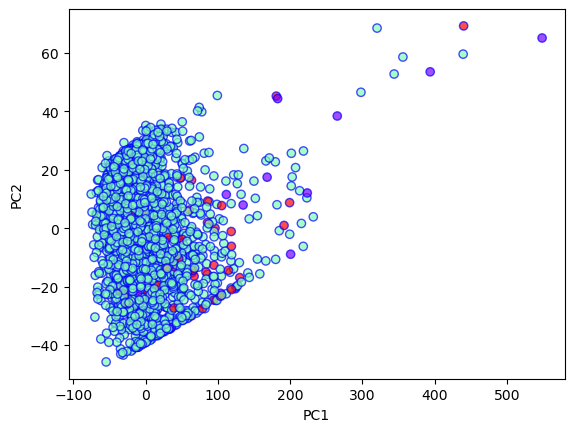

In [25]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=1)

In [32]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.96


<Axes: >

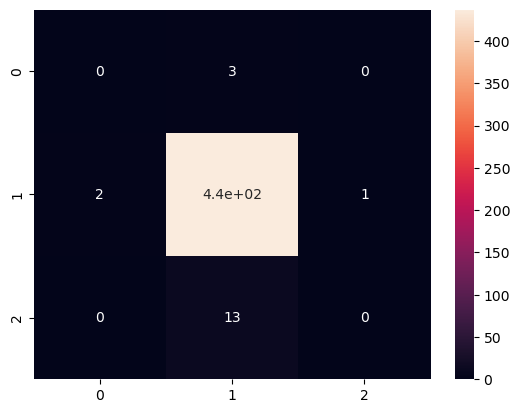

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = kNN.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

In [55]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=1)

In [60]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 5, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [61]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9614035087719298
Accuracy: 0.96


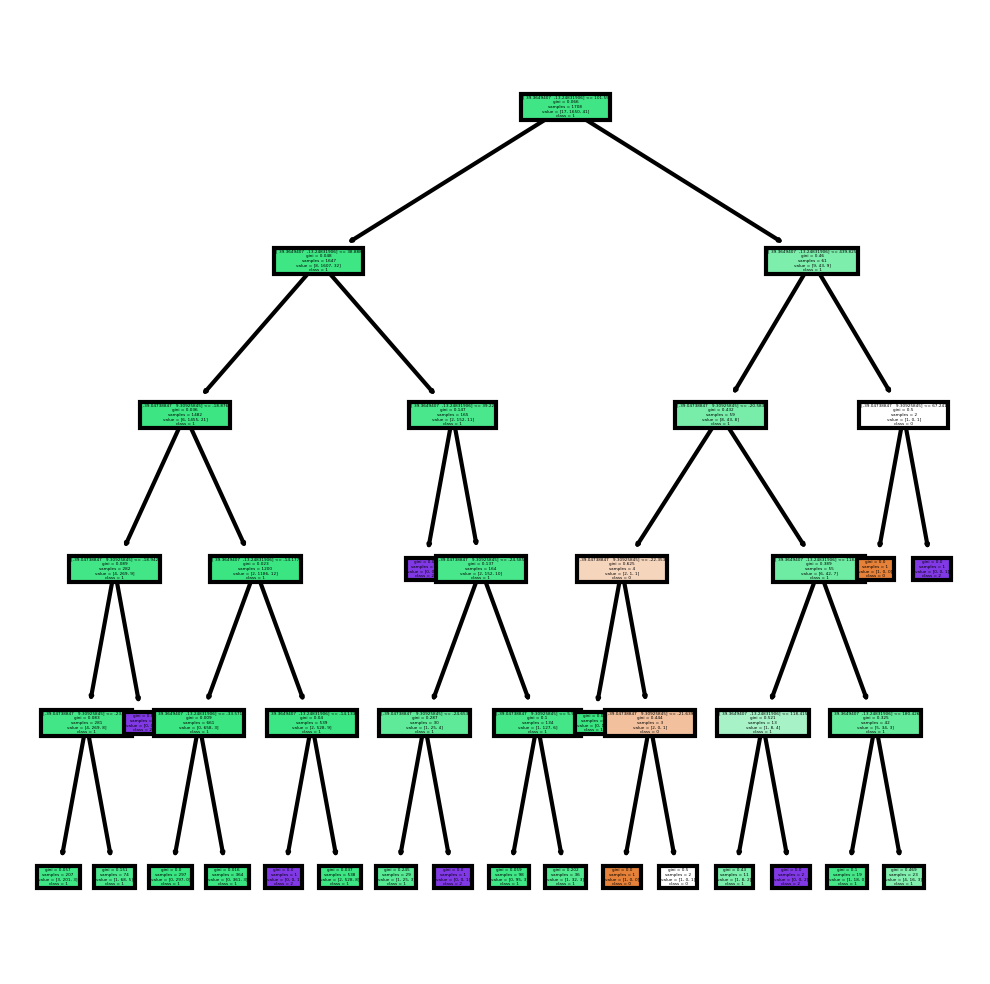

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# column names for dataset
fn=X_pca
# classes of dataset
cn=['0','1', '2']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names = cn,
           filled = True);
# In case of any errors, install conda install python-graphviz     on the command line